<a href="https://colab.research.google.com/github/gracegerwe/brain_simulations/blob/master/brain_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install necessary library
!pip install ipympl

In [ ]:
pip install tvb-library

In [ ]:
pip install tvb-framework

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2024-05-06 00:59:22,611 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


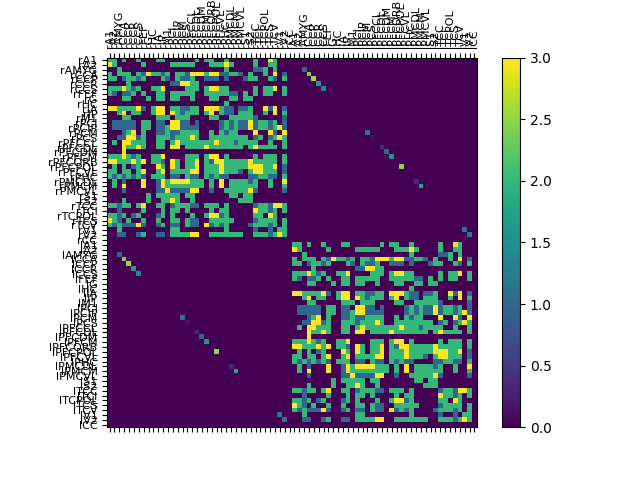

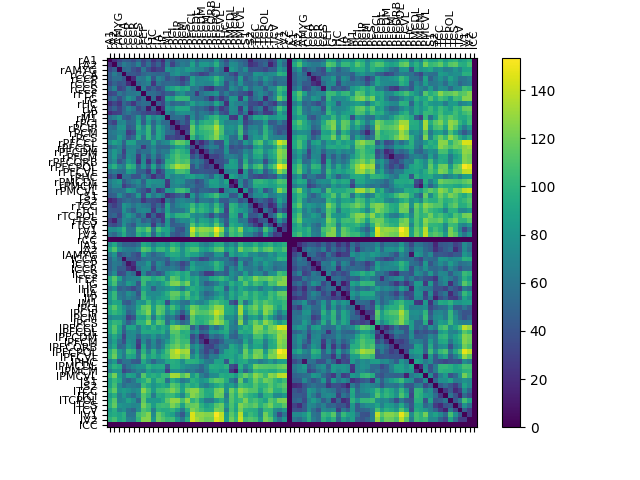

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy
from tvb.simulator.lab import *

#enable support for third party widgets
from google.colab import output
output.enable_custom_widget_manager()

#input synthetic data, process it & plot it
conn = connectivity.Connectivity.from_file("/content/drive/MyDrive/TVB_Connectivity_Data/connectivity_76.zip")
conn.configure()
conn.summary_info
plot_connectivity(connectivity = conn)

In [ ]:
# configure stimulus spatial pattern
weighting = numpy.zeros((76, ))
weighting[[14, 52, 11, 49]] = 0.1

#define temporal profile by selecting equation
eqn_t = equations.PulseTrain()

#set parameters (default Gaussian)
eqn_t.parameters['onset'] = 1.5e3
eqn_t.parameters['T'] = 100.0
eqn_t.parameters['tau'] = 50.0

#combine spatial and temporal components into an object to be used in simulator
stimulus = patterns.StimuliRegion(
    temporal=eqn_t,
    connectivity=conn,
    weight=weighting)

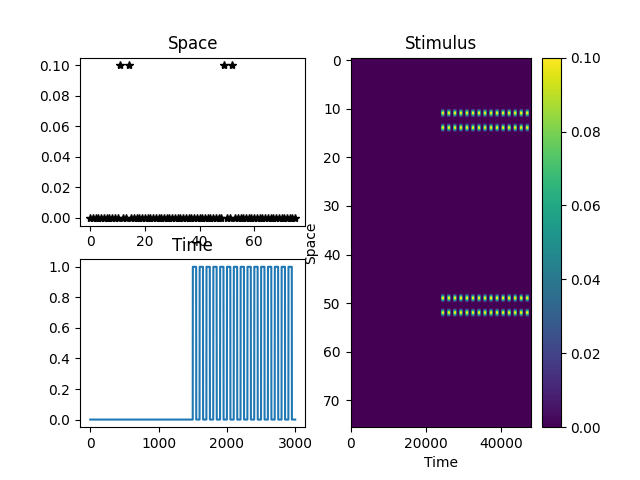

In [ ]:
#Configure space and time
stimulus.configure_space()
stimulus.configure_time(numpy.arange(0., 3e3, 2**-4))

#And take a look
plot_pattern(stimulus)

2024-05-06 01:01:09,942 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


<ipython-input-14-5b0e9139e033>:4: DeprecationWarning: Call to deprecated class HeadPlotter3D. (Use tvb-widgets instead)
  hp = HeadPlotter3D()


Output()

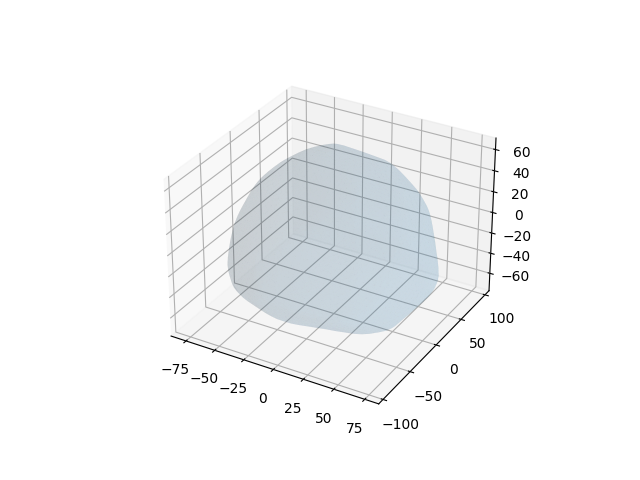

In [ ]:
%matplotlib widget
from tvb.simulator.plot.head_plotter_3d import HeadPlotter3D

hp = HeadPlotter3D()

hp.display_source_sensor_geometry()

In [ ]:
#create & run the simulation
sim = simulator.Simulator(
    model=models.Generic2dOscillator(a=numpy.array([0.3]), tau=numpy.array([2])),
    connectivity=conn,
    coupling=coupling.Difference(a=numpy.array([7e-4])),
    integrator=integrators.HeunStochastic(dt=0.5, noise=noise.Additive(nsig=numpy.array([5e-5]))),
    monitors=(
        monitors.TemporalAverage(period=1.0),
        ),
    stimulus=stimulus,
    simulation_length=5e3, # 1 minute simulation
).configure()

(tavg_time, tavg_data),  = sim.run()

Text(0.5, 0, 'Time (ms)')

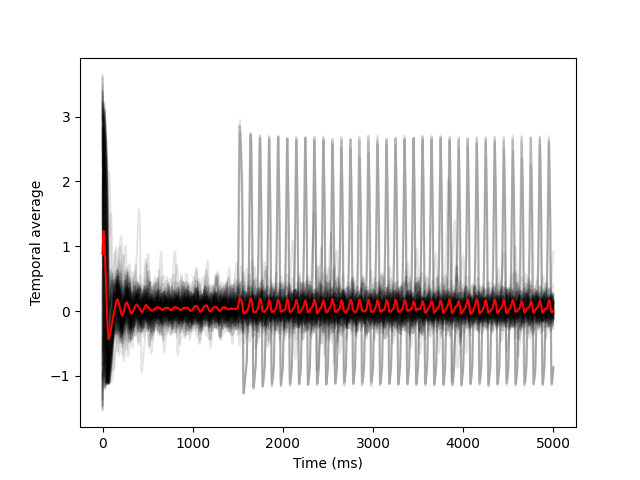

In [ ]:
#visualize it
plt.figure()
plt.plot(tavg_time, tavg_data[:, 0, :, 0], 'k', alpha=0.1)
plt.plot(tavg_time, tavg_data[:, 0, :, 0].mean(axis=1), 'r', alpha=1)
plt.ylabel("Temporal average")
plt.xlabel('Time (ms)')

In [ ]:
#show details about the time series
import tvb.datatypes.time_series
tsr = tvb.datatypes.time_series.TimeSeriesRegion(
    data=tavg_data,
    connectivity=conn,
    sample_period=sim.monitors[0].period / 1000.0,
    sample_period_unit="s")
tsr.configure()
tsr

In [ ]:
#show the customizable simulator
import tvb.simulator.plot.timeseries_interactive as ts_int
tsi = ts_int.TimeSeriesInteractive(time_series=tsr)
tsi.configure()
tsi.show()

<ipython-input-11-ff5be4c03376>:3: DeprecationWarning: Call to deprecated class TimeSeriesInteractive. (Use tvb-widgets instead)
  tsi = ts_int.TimeSeriesInteractive(time_series=tsr)


GridBox(children=(Output(layout=Layout(border='solid 1px black', margin='3px 3px 3px 3px', padding='2px 2px 2p…